In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
infection = pd.read_csv('Classeur.csv', sep=";",index_col='Date',parse_dates=True)

(33, 1) (33, 1) (33, 1)


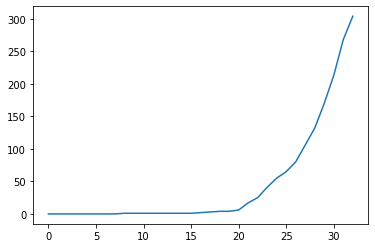

In [3]:
infection.head()
x=infection['Infected']
z=infection['Days']
y=infection['Dead']
y = y.values.reshape(y.shape[0],1)
x = x.values.reshape(x.shape[0],1)
z = z.values.reshape(z.shape[0],1)
print(x.shape,y.shape,z.shape)
plt.plot(infection['Days'],infection['Dead'], markersize=4)

In [4]:
y

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  1],
       [  2],
       [  3],
       [  4],
       [  4],
       [  6],
       [ 17],
       [ 25],
       [ 41],
       [ 55],
       [ 65],
       [ 80],
       [106],
       [132],
       [170],
       [213],
       [268],
       [304]])

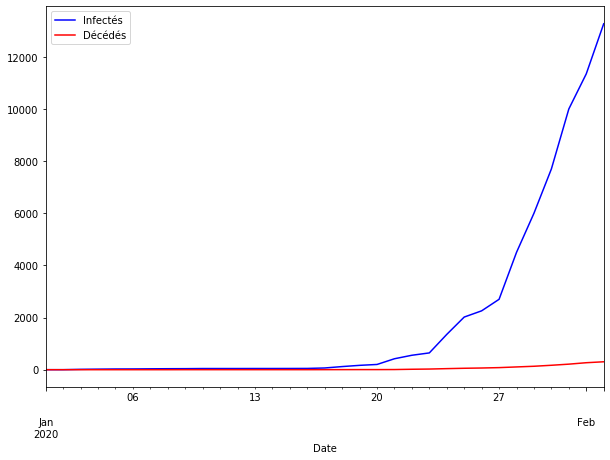

In [5]:
plt.figure(figsize=(10,7))
infection['Infected'].plot(label="Infectés",color='blue')
infection['Dead'].plot(label="Décédés",color='red')
plt.legend()

In [6]:
#X.shape, y.shape #,Z.shape

In [7]:
Z = np.hstack((z,np.ones(z.shape)))
Z= np.hstack((z**2,Z))
#X
#Y = np.hstack((y,np.ones(z.shape)))
Z

array([[0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [4.000e+00, 2.000e+00, 1.000e+00],
       [9.000e+00, 3.000e+00, 1.000e+00],
       [1.600e+01, 4.000e+00, 1.000e+00],
       [2.500e+01, 5.000e+00, 1.000e+00],
       [3.600e+01, 6.000e+00, 1.000e+00],
       [4.900e+01, 7.000e+00, 1.000e+00],
       [6.400e+01, 8.000e+00, 1.000e+00],
       [8.100e+01, 9.000e+00, 1.000e+00],
       [1.000e+02, 1.000e+01, 1.000e+00],
       [1.210e+02, 1.100e+01, 1.000e+00],
       [1.440e+02, 1.200e+01, 1.000e+00],
       [1.690e+02, 1.300e+01, 1.000e+00],
       [1.960e+02, 1.400e+01, 1.000e+00],
       [2.250e+02, 1.500e+01, 1.000e+00],
       [2.560e+02, 1.600e+01, 1.000e+00],
       [2.890e+02, 1.700e+01, 1.000e+00],
       [3.240e+02, 1.800e+01, 1.000e+00],
       [3.610e+02, 1.900e+01, 1.000e+00],
       [4.000e+02, 2.000e+01, 1.000e+00],
       [4.410e+02, 2.100e+01, 1.000e+00],
       [4.840e+02, 2.200e+01, 1.000e+00],
       [5.290e+02, 2.300e+01, 1.00

In [8]:
theta = np.random.randn(3,1)
print(theta)

[[ 0.39141101]
 [-0.40580005]
 [ 0.43121657]]


In [9]:
def model(X,theta):
    return X.dot(theta)

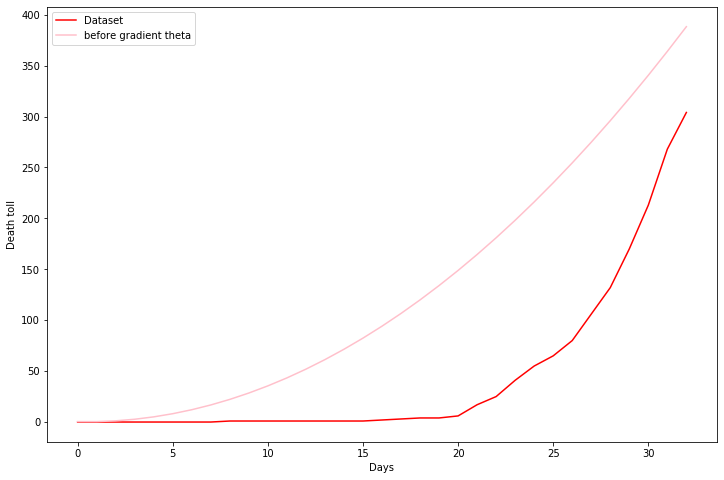

In [10]:
plt.figure(figsize=(12,8))
plt.xlabel('Days')
plt.ylabel('Death toll')
plt.plot(z,y, c='red', label='Dataset')

plt.plot(z,model(Z,theta), c='pink',label='before gradient theta')
plt.legend()

In [11]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [12]:
print(cost_function(Z,y,theta))

5430.3685941336935


In [13]:
def grad(X,y,theta):
    m = len(y)
    return 1/m*X.T.dot(model(X,theta)- y)

In [14]:
print(grad(Z,y,theta))

[[44498.13070685]
 [ 1862.80172445]
 [   84.08211151]]


In [15]:
def gradient_descent(X,y,theta, learningRate,n_iterations):
    theta_history = np.zeros((n_iterations,3))
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learningRate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        theta_history[i,:]=theta.T
    return theta, cost_history,theta_history

In [32]:
learning_rate = 0.000009
n_iterations=1000
theta_final, cost_history, theta_history = gradient_descent(Z,y,theta,learning_rate,n_iterations)

In [33]:
print(theta_final)
print(theta_history.shape)

[[ 0.23649138]
 [-1.64254674]
 [ 0.32211929]]
(1000, 3)


In [34]:
prediction=model(Z,theta_final)

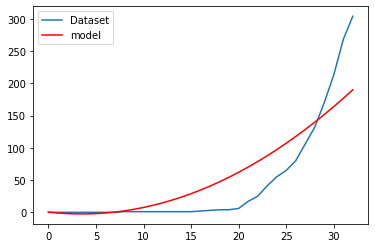

In [35]:
plt.plot(z,y, label='Dataset')
plt.plot(z,prediction,color='r',label='model')
plt.legend()

In [36]:
#y=A*r**x
testpred = theta_final.item(0)*(32**2)+theta_final.item(1)*21+theta_final.item(2) # Number of death= theta(1)*nb of days + theta(0)
testpred

207.995815285651

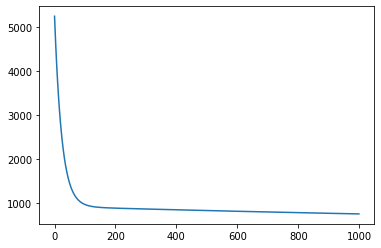

In [37]:
plt.plot(range(n_iterations),cost_history)

In [38]:
def coef_deter(y,pred):
    u= ((y-pred)**2).sum()
    v= ((y-y.mean())**2).sum()
    return 1 - u/v

In [39]:
coef_deter(y,prediction) # Not linear problem 0.45 

0.7696802526340688